<a href="https://colab.research.google.com/github/sspaulc/EDA--ABTN0105-Play-Store-App-Review-Analysis/blob/main/Sanchita_Paul_Play_Store_App_Review_Analysis_%5BABTN0105%5D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mount the drive and import csv files into different data frames
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
playstore_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/Play Store Data.csv")

In [4]:
user_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/User Reviews.csv")

In [30]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [87]:
playstore_df_no_duplicates= playstore_df.drop_duplicates().reset_index()

In [88]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [99]:
#Convert the string row to integers

def convert_string_integers(installs):
  '''This function coverts all the string elements to integer in the install column'''
  str_installs=""
  installs_list=installs.split(",")
  for item in installs_list:
    #iterate over the list
    str_installs=str_installs+ item
  try:
    int_installs= int(str_installs[:-1])
    return int_installs #
  except ValueError:
    #For '' strings 
    return 0

In [104]:

playstore_df_no_duplicates['Int_Installs']= playstore_df_no_duplicates['Installs'].apply(convert_string_integers)

In [105]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
 14  Int_Installs    10358 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.2+ MB


Text(0, 0.5, 'Frequency')

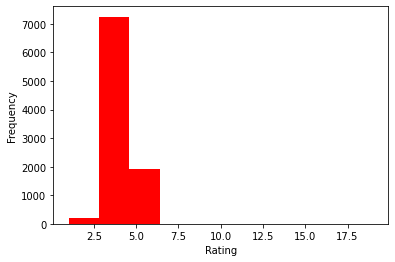

In [114]:
#Use histogram to check where most of the reviews lie

rating= playstore_df[~playstore_df['Rating'].isna()]['Rating']

plt.hist(rating.values,color= "red")
plt.xlabel('Rating')
plt.ylabel('Frequency')

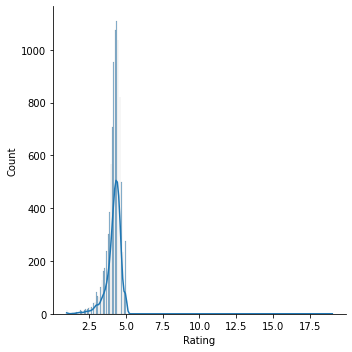

In [17]:
sns.displot(playstore_df['Rating'],kde= True )

In [116]:
playstore_df_no_duplicates['Rating'].value_counts().head(5)

4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
Name: Rating, dtype: int64

The maximum number of ratings lie in the range of 4.2 and 4.6.

Question 1: What is the relationship between categories and sentiment?